# AI Tools

In [2]:
import pandas as pd
tools = pd.read_csv("C:/Users/Jhonnatan/Documents/GitHub/Impact-of-AI-in-organizations/Datasets/aitools.csv")
tools.head()
# tools.describe()

,tool_mage_url,tool,tool_description,category,upvotes,tags
0,https://uploads-ssl.webflow.com/63994dae103371...,Codeium,"Helps developers understand, modify, and test ...",Generative Code,1987,NaN
1,https://uploads-ssl.webflow.com/63994dae103371...,LeiaPix,Upload an image and turn it into a 3D animation,Image Improvement,1779,Generative Video
2,https://uploads-ssl.webflow.com/63994dae103371...,GPT-3 Playground (OpenAI),Free AI writing tool - Let the AI generate any...,Copywriting,1433,Research
3,https://uploads-ssl.webflow.com/63994dae103371...,BlueWillow,AI-powered image generating tool in Discord,Generative Art,1230,Matt's Picks
4,https://uploads-ssl.webflow.com/63994dae103371...,Character.AI,Have chat conversations with AI characters,Chat,954,For Fun


In [3]:
import pandas as pd
tools_2 = pd.read_csv("C:/Users/Jhonnatan/Documents/GitHub/Impact-of-AI-in-organizations/Datasets/futuretools.csv")
tools_2.head()
tools_2.describe()

,upvotes
count,1569.000000
mean,82.434672
std,326.704599
min,1.000000
25%,16.000000
50%,28.000000
75%,55.000000
max,6570.000000


### Popularity of tools by category. Calculating the average number of upvotes

The bar chart above shows the average number of upvotes for each category in the dataset. This visualization helps us understand which categories are more popular based on the average upvotes they receive. Categories at the top of the chart have higher average upvotes, indicating greater popularity, while those at the bottom have lower average upvotes.

C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_13544\2947949601.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_upvotes.values, y=category_upvotes.index, palette="viridis")


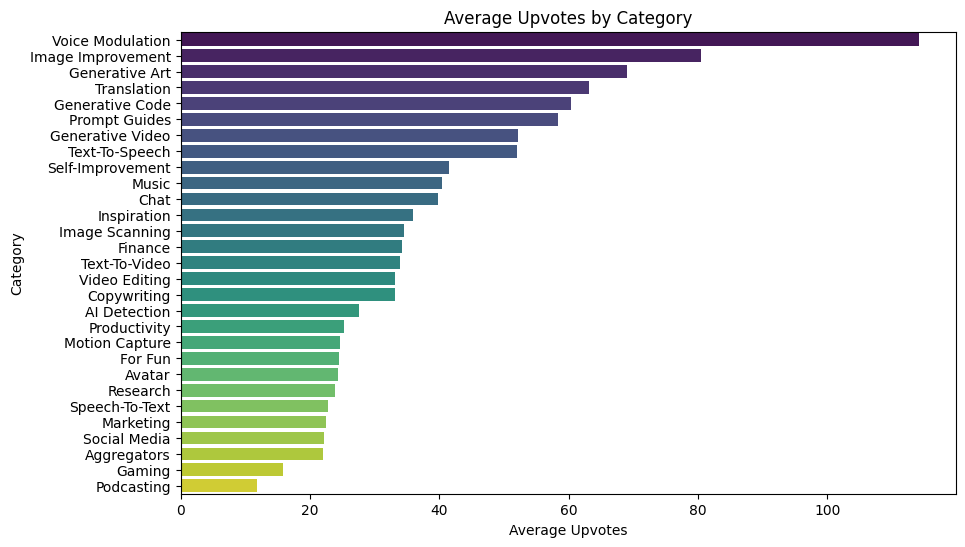

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis 1: Popularity by Category

# Group the tools by category and calculate the average number of upvotes
category_upvotes = tools.groupby('category')['upvotes'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=category_upvotes.values, y=category_upvotes.index, palette="viridis")
plt.xlabel('Average Upvotes')
plt.ylabel('Category')
plt.title('Average Upvotes by Category')
plt.show()

### Analyzing the influence of tags on the upvotes.

Examine if tools with specific tags tend to receive more upvotes

The bar chart displayed illustrates the average number of upvotes for each tag associated with the AI tools in the dataset. This analysis helps in understanding the potential influence of tags on a tool's popularity. Tags at the top of the chart are associated with tools that, on average, receive more upvotes, indicating higher popularity for those tags. Conversely, tags at the bottom of the chart are associated with fewer average upvotes.

C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_13544\505839085.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_upvotes.values, y=tag_upvotes.index, palette="mako")


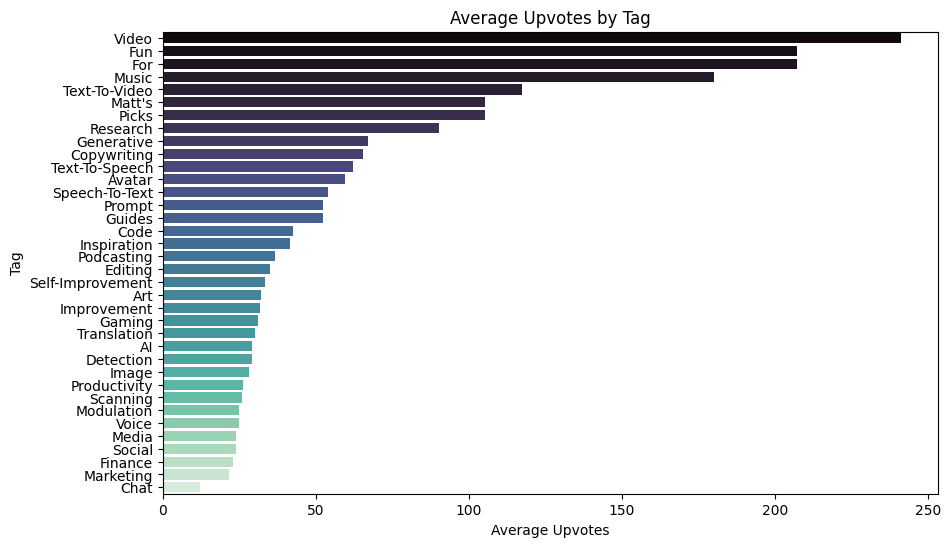

In [11]:
# Hypothesis 2: Tag Influence

# Expand the 'tags' column into separate rows for each tag
data_expanded_tags = tools.drop('tags', axis=1).join(tools['tags'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True).rename('tag'))

# Group the data by tag and calculate the average number of upvotes
tag_upvotes = data_expanded_tags.groupby('tag')['upvotes'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_upvotes.values, y=tag_upvotes.index, palette="mako")
plt.xlabel('Average Upvotes')
plt.ylabel('Tag')
plt.title('Average Upvotes by Tag')
plt.show()

### Examining the relationship between the length of a tool's description and its popularity (measured by upvotes).

The scatter plot above shows the relationship between the length of the tool's description and the number of upvotes it received. The correlation coefficient is approximately 0.017, which indicates a very weak positive correlation between description length and upvotes. This suggests that the length of a tool's description does not significantly influence its popularity, as measured by upvotes.

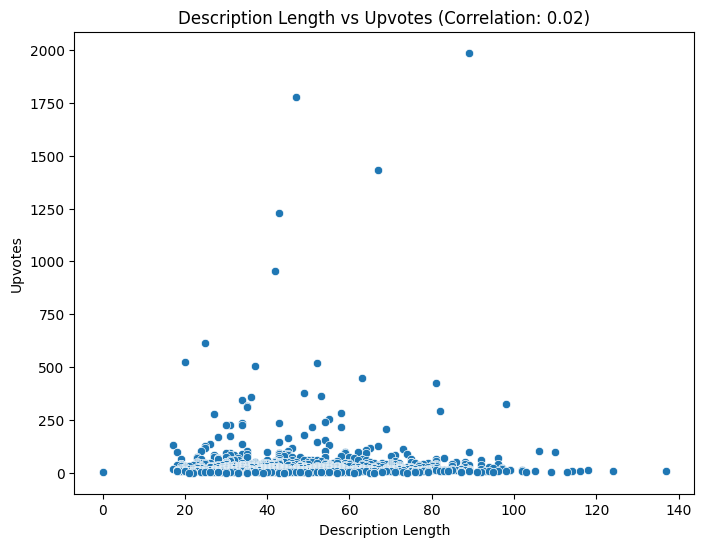

0.016507171417017654

In [14]:
# Handling missing or non-string values in 'tool_description'
tools['description_length'] = tools['tool_description'].fillna('').apply(lambda x: len(str(x)))

# Recompute correlation between description length and upvotes
correlation = tools[['description_length', 'upvotes']].corr().iloc[0, 1]

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tools, x='description_length', y='upvotes')
plt.xlabel('Description Length')
plt.ylabel('Upvotes')
plt.title(f'Description Length vs Upvotes (Correlation: {correlation:.2f})')
plt.show()

correlation


###  Category Diversity

 Analyze the diversity of tools within each category. The hypothesis is that certain categories might have a broader range of tools compared to others, indicating a diverse field of applications or use cases within that category. Calculate the number of unique tools in each category and then visualize this data to understand the distribution of tools across different categories.

C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_13544\498069664.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_diversity.values, y=category_diversity.index, palette="cubehelix")


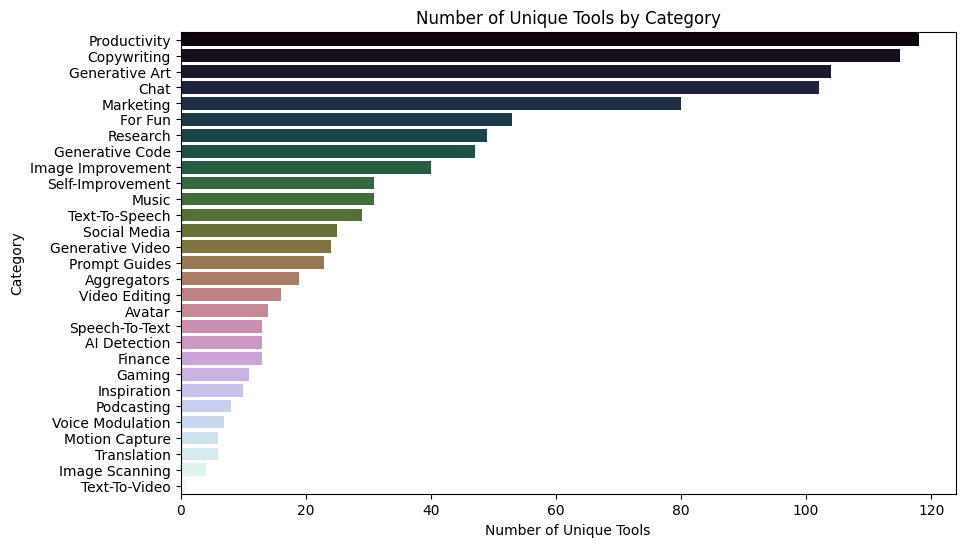

In [15]:
# Hypothesis 4: Category Diversity

# Calculate the number of unique tools in each category
category_diversity = tools.groupby('category')['tool'].nunique().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=category_diversity.values, y=category_diversity.index, palette="cubehelix")
plt.xlabel('Number of Unique Tools')
plt.ylabel('Category')
plt.title('Number of Unique Tools by Category')
plt.show()
